<a href="https://colab.research.google.com/github/castudil/som-lstm/blob/main/som_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import MinMaxScaler # funcion para el escalar los datos

# plots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3D


# Load Datasets

Load all the CSV files form URL and merge into a single dataframe

In [ ]:
path = 'https://raw.githubusercontent.com/castudil/som-lstm/main/data/' # use your path
cities = ['chillan','curico','linares','los_angeles','osorno','puerto_montt','rancagua','san_fernando','talca'];
li = []
for i in cities:
  filename=path+i+'.csv'
  print('loading: '+filename)
  df = pd.read_csv(filename, index_col=None, header=0)
  # Convert the date column to a datestamp type
  df['date'] = pd.to_datetime(df['date'])
  # Set the date column as the index of your DataFrame meat
  df['city']=i
  df = df.set_index('date')
  #print(df.head(5))
  li.append(df)

print('consolidating into a single data frame.')
frame = pd.concat(li, axis=0, ignore_index=False)
print('displaying a random sample.')
print(frame.sample(n = 15))
print(frame.describe())
#print(frame['date'].dt.date.min()+ ' to '+ frame['date'].dt.date.max())
print(frame.index.min())
print(frame.index.max())


loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/chillan.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/curico.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/linares.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/los_angeles.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/osorno.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/puerto_montt.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/rancagua.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/san_fernando.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/talca.csv
consolidating into a single data frame.
displaying a random sample.
                       PM25          city
date                                     
2016-07-30 13:00:00  31.480  san_fernando
2018-01-02 04:00:00   8.000  san_fernando
2019-1

 

1.   The data considers nine different cities
2.   The data contains ~40K data rows
3.   No missing data
4.   PM2.5 information
5.   Data ranges from the year 2016 to 2020 









## Charts

Plot the time series for one of the cities

               PM25
count  43847.000000
mean      24.466460
std       36.239286
min        0.000000
25%        7.425000
50%       13.000000
75%       26.000000
max      555.000000


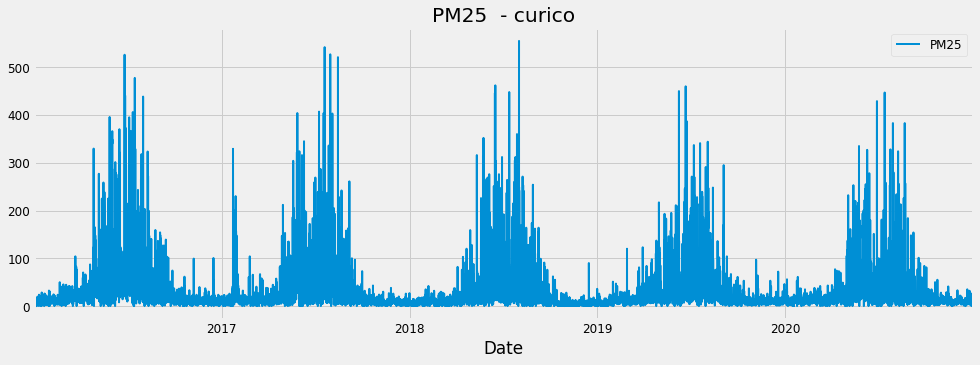

In [ ]:
def plot_city(city='curico'):
  plt.rcParams['figure.figsize'] = (15, 5)
  plt.style.use('fivethirtyeight')

  df=frame.loc[frame['city'] == city] # Sleecting Data for Curico
  print(df.describe())

  # Plot time series dataset
  ax = df.plot(linewidth=2, fontsize=12);

  # Additional customizations
  ax.set_xlabel('Date');
  ax.set_title('PM25  - ' + city)
  ax.legend(fontsize=12);
  plt.show()

plot_city('curico')

1.   Most of the peaks occur in winter, these PM25 saturation obbey to a stational nature
2.   An exception occurs in the summer of 2017, perhaps attributed to fire forest. This information is corroborated from the [newspapers](https://ambiental.net/2017/02/el-incendio-mas-destructivo-en-la-historia-reciente-de-chile/ ), mentioning that fires as one of the most devasting of the recent years and affecting the center-south of Chile.
3. we corroborate the lalter situation by analyzing the case of 2017 in nearby cities
4. we are interested in wood stove combustion
5. also wer are focused on htree months of the winter season. (check the exact dates the [paper](https://ieeexplore.ieee.org/document/9037794)
6. TODO: the data must be cut, according to the dates specified in the previous paper)
7. there is also a [youtbe video](https://www.youtube.com/watch?v=QBOnjVfikTY) with a explanation of a relataed study (in spanish)



               PM25
count  43847.000000
mean      16.653470
std       27.244984
min        0.000000
25%        3.000000
50%        8.000000
75%       19.000000
max      766.200000


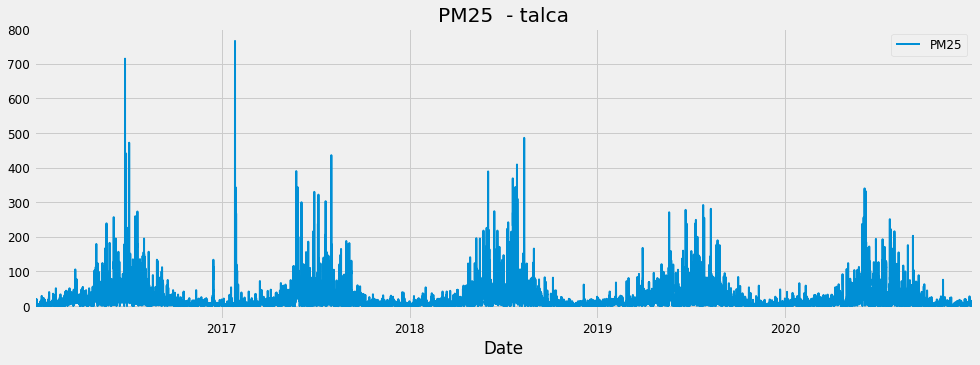

In [ ]:
plot_city('talca')

from the plot it is possible to see that the anomality was also captured in the same period of time.

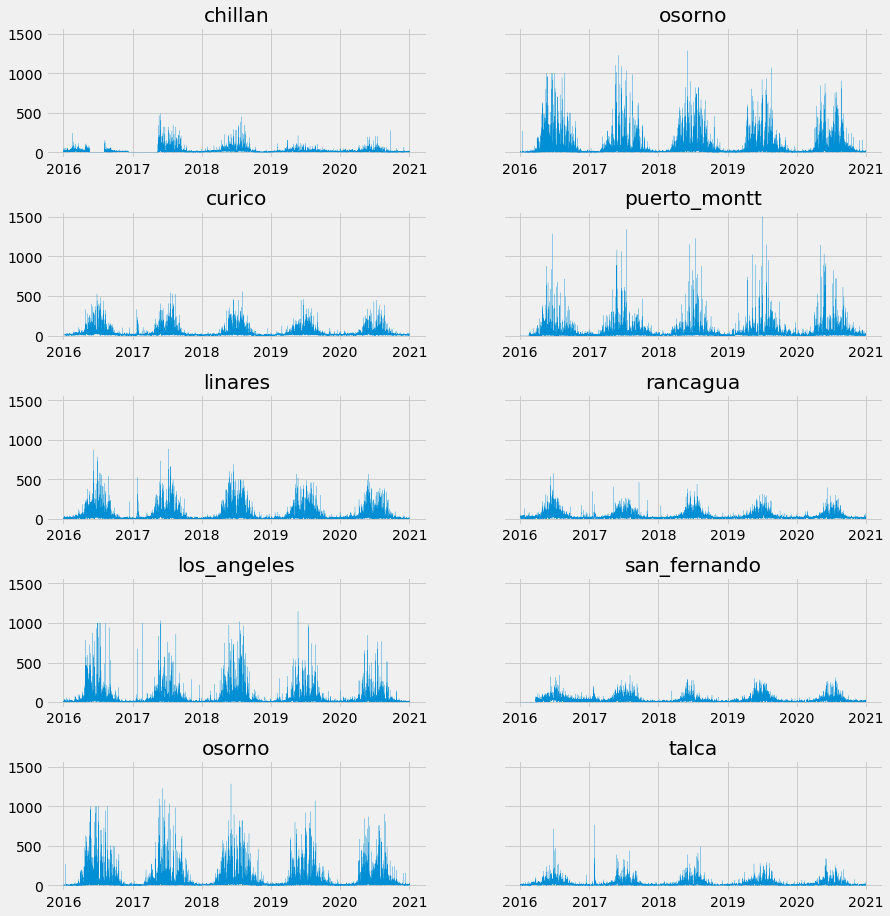

In [ ]:
df_columnCity = pd.DataFrame()

# transform cities into columns of the data frame
for city in cities:
  dfCity=frame.loc[frame['city'] == city]
  df_columnCity[city] = dfCity['PM25']#.resample('D').mean()


# initializes the subplots 
figure, axes = plt.subplots(nrows=5,
                            ncols=2,
                            figsize=(15,15),
                            sharex=False,
                            sharey=True)


#cities_graficos =['curico', 'rancagua', 'linares', 'los_angeles', 'san_fernando', 'talca']


# Draw the PM2.5 subplots for the cities. 
for i in range(5):
  axes[i, 0].plot(df_columnCity[cities[i]], linewidth=0.2)
  axes[i, 0].set_title(cities[i])
  #if(i != 4):
  axes[i, 1].plot(df_columnCity[cities[i+4]], linewidth=0.2)
  axes[i, 1].set_title(cities[i+4])


# set adjust of the subplots
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

# show the subplots
plt.show()



In [ ]:
def columnsCityMaxToMin(df):
  serie = df.max().sort_values( ascending=False).index
  return serie

<ipython-input-63-5f69039f0fb0>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels([int(val) for val in ax.get_zticks()],rotation=-10,)
<ipython-input-63-5f69039f0fb0>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([index_dates[int(val)].strftime('%m/%y') for val in ax.get_xticks()[:-1]] + [''], rotation=0, fontdict={'verticalalignment': 'top', 'horizontalalignment': 'center'})


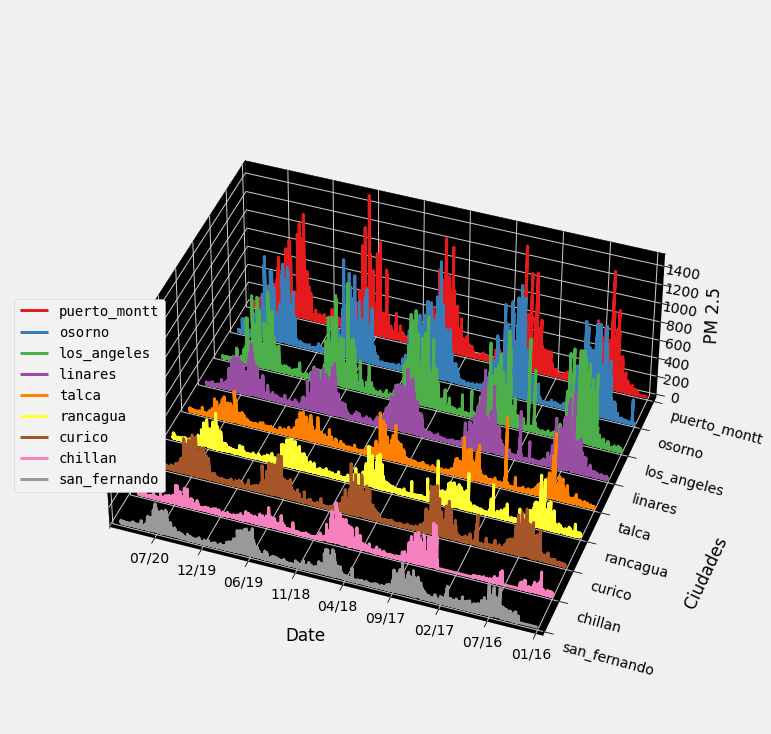

In [ ]:
# create the figure
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_alpha(1)

# get the cmap to use
cmap = get_cmap('Set1')

# get the slice
current_slice = df_columnCity.values[:df_columnCity.shape[0], :]
index_names = columnsCityMaxToMin(df_columnCity)
index_dates = df_columnCity.index

# for each index...
for i in range(current_slice.shape[1]):

    # get the coordinates
    x = np.array(np.arange(current_slice.shape[0]))
    y = np.tile(i, current_slice.shape[0])
    z = np.array(current_slice[:, df_columnCity.columns.to_list().index(index_names[i]) ])

    lc = Line3D(x,y,z)

    # Set the values used for colormapping
    lc.set_linewidth(3)
    lc.set_color(cmap(i))
    lc.set_label(index_names[i])
    ax.add_line(lc)

# add the grids
ax.legend(loc='center left', bbox_to_anchor=(0, 0.46), fancybox=True, facecolor=(.95,.95,.95,1), framealpha=1, shadow=False, frameon=True, ncol=1, columnspacing=0, prop={'family': 'DejaVu Sans Mono'})
ax.set_zlabel('PM 2.5', labelpad=15)
ax.set_zlim(0, 1500)
ax.set_zticklabels([int(val) for val in ax.get_zticks()],rotation=-10,)
ax.set_xlabel('Date', labelpad=30)
ax.set_xlim(0, current_slice.shape[0]-1)
ax.set_xticklabels([index_dates[int(val)].strftime('%m/%y') for val in ax.get_xticks()[:-1]] + [''], rotation=0, fontdict={'verticalalignment': 'top', 'horizontalalignment': 'center'})
ax.set_ylabel('Ciudades', labelpad=70)
ax.set_yticks(np.arange(current_slice.shape[1]))
ax.set_yticklabels([index_names[i] for i in range(current_slice.shape[1])], rotation=-15, fontdict={'verticalalignment': 'top', 'horizontalalignment': 'left'})
ax.w_xaxis.set_pane_color((0, 0, 0, 1.0))
ax.w_yaxis.set_pane_color((0, 0, 0, 1.0))
ax.w_zaxis.set_pane_color((0, 0, 0, 1.0))
ax.view_init(40, -250)

# ------------------------------------------------------------------
x_scale=1.8
y_scale=1.5
z_scale=1

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0



def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)

ax.get_proj=short_proj

fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
# ------------------------------------------------------------------

# show the plot
plt.show()


## Seasonality

Check the seasonality of the data

In [ ]:
  
#!pip install statsmodels


In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
def test_stationarity(city='curico'):
  timeseries = frame.loc[frame['city'] == city] # Sleecting Data for Curico
  # #print(timeseries)

  # # Determining rolling statistics
  # rolmean = timeseries.rolling(12).mean()
  # rolstd = timeseries.rolling(12).std()

  # # Plot rolling statistics:
  # plt.rcParams['figure.figsize'] = (20, 5)
  # fig, ax = plt.subplots(figsize=(20,6))


  # orig = ax.plot(timeseries.drop(['city'], axis=1) , color='blue',label='Original', linewidth=1.5)
  # mean = ax.plot(timeseries.drop(['city'], axis=1), color='red', label='Rolling Mean',linewidth=1.5)
  # std = ax.plot(timeseries.drop(['city'], axis=1), color='black', label = 'Rolling Std' , linewidth=1.5)

  # plt.legend(loc='best')
  # plt.title('Rolling Mean & Standard Deviation')
  # plt.show(block=False)
    
  # Perform Dickey-Fuller test:
  print ('Results of Dickey-Fuller Test:')
  timeseries = timeseries.iloc[:,0].values
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

test_stationarity('curico')

Results of Dickey-Fuller Test:
Test Statistic                -1.401113e+01
p-value                        3.712124e-26
#Lags Used                     5.400000e+01
Number of Observations Used    4.379200e+04
Critical Value (1%)           -3.430499e+00
Critical Value (5%)           -2.861606e+00
Critical Value (10%)          -2.566805e+00
dtype: float64


Shorten the data set, to have only the months from April to August. 

In [ ]:

filtered_df = pd.DataFrame()
lista = []
# filter the dataset between the months of April and August from 2016 to 2020
for i in range(16,21):
  lista.append(df_columnCity.loc['20'+str(i)+'-04-1': '20'+str(i)+'-08-31'])

# consolidating into a single data frame
filtered_df = pd.concat(lista)

print(filtered_df.describe())
print(filtered_df.index.min())
print(filtered_df.index.max())




            chillan        curico       linares   los_angeles        osorno  \
count  18360.000000  18360.000000  18360.000000  18360.000000  18360.000000   
mean      22.057152     41.742579     52.373651     55.214405     68.319743   
std       31.171215     48.698878     70.348094     92.084881    110.503141   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000     14.840000     14.000000     14.000000     14.000000   
50%       14.465400     26.000000     29.000000     26.000000     29.000000   
75%       25.174125     48.000000     59.000000     56.000000     68.000000   
max      485.000000    555.000000    882.000000   1147.000000   1284.000000   

       puerto_montt      rancagua  san_fernando         talca  
count  18360.000000  18360.000000  18360.000000  18360.000000  
mean      42.665847     43.446887     33.286222     28.361704  
std       82.850893     42.294541     32.890761     35.043856  
min        0.000000      0.00000

## Calplot


In [ ]:
"""
Calendar heatmaps from Pandas time series data.
Plot Pandas time series data sampled by day in a heatmap per calendar year.
"""

import calendar
import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
#import pandas as pd

from matplotlib.colors import ColorConverter, ListedColormap
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

def yearplot(data, year=None, how='sum',
             vmin=None, vmax=None,
             cmap='viridis', fillcolor='whitesmoke',
             linewidth=1, linecolor=None, edgecolor='gray',
             daylabels=calendar.day_abbr[:], dayticks=True,
             dropzero=None,
             textformat=None, textfiller='', textcolor='black',
             monthlabels=calendar.month_abbr[1:], monthlabeloffset=15,
             monthticks=True,
             ax=None, **kwargs):
    """
    Plot one year from a timeseries as a calendar heatmap.
    Parameters
    ----------
    data : Series
        Data for the plot. Must be indexed by a DatetimeIndex.
    year : integer
        Only data indexed by this year will be plotted. If `None`, the first
        year for which there is data will be plotted.
    how : string
        Method for resampling data by day. If `None`, assume data is already
        sampled by day and don't resample. Otherwise, this is passed to Pandas
        `Series.resample`.
    vmin, vmax : floats
        Values to anchor the colormap. If `None`, min and max are used after
        resampling data by day.
    cmap : matplotlib colormap name or object
        The mapping from data values to color space.
    fillcolor : matplotlib color
        Color to use for days without data.
    linewidth : float
        Width of the lines that will divide each day.
    linecolor : color
        Color of the lines that will divide each day. If `None`, the axes
        background color is used, or 'white' if it is transparent.
    daylabels : list
        Strings to use as labels for days, must be of length 7.
    dayticks : list or int or bool
        If `True`, label all days. If `False`, don't label days. If a list,
        only label days with these indices. If an integer, label every n day.
    dropzero : bool
        If `True`, don't fill a color for days with a zero value.
    monthlabels : list
        Strings to use as labels for months, must be of length 12.
    monthlabeloffset : integer
        Day offset for labels for months to adjust horizontal alignment.
    monthticks : list or int or bool
        If `True`, label all months. If `False`, don't label months. If a
        list, only label months with these indices. If an integer, label every
        n month.
    edgecolor : color
        Color of the lines that will divide months.
    textformat : string
        Text format string for grid cell text
    textfiller : string
        Fallback text for grid cell text for cells with no data
    textcolor : color
        Color of the grid cell text
    ax : matplotlib Axes
        Axes in which to draw the plot, otherwise use the currently-active
        Axes.
    kwargs : other keyword arguments
        All other keyword arguments are passed to matplotlib `ax.pcolormesh`.
    Returns
    -------
    ax : matplotlib Axes
        Axes object with the calendar heatmap.
    """

    if year is None:
        year = data.index.sort_values()[0].year

    if how is None:
        # Assume already sampled by day.
        by_day = data
    else:
        # Sample by day.
        by_day = data.resample('D').agg(how)

    # Default to dropping zero values for a series with over 50% of rows being zero.
    if by_day[by_day == 0].count() > 0.5 * by_day.count():
        dropzero = True

    if dropzero:
        by_day = by_day.replace({0: np.nan}).dropna()

    # Min and max per day.
    if vmin is None:
        vmin = by_day.min()
    if vmax is None:
        vmax = by_day.max()

    if ax is None:
        ax = plt.gca()

    if linecolor is None:
        # Unfortunately, linecolor cannot be transparent, as it is drawn on
        # top of the heatmap cells. Therefore it is only possible to mimic
        # transparent lines by setting them to the axes background color. This
        # of course won't work when the axes itself has a transparent
        # background so in that case we default to white which will usually be
        # the figure or canvas background color.
        linecolor = ax.get_facecolor()
        if ColorConverter().to_rgba(linecolor)[-1] == 0:
            linecolor = 'white'

    # Filter on year.
    by_day = by_day[str(year)]

    # Add missing days.
    by_day = by_day.reindex(
        pd.date_range(start=str(year), end=str(year + 1),
                      freq='D', tz=by_day.index.tzinfo)[:-1])

    # Create data frame we can pivot later.
    by_day = pd.DataFrame({'data': by_day,
                           'fill': 1,
                           'day': by_day.index.dayofweek,
                           'week': by_day.index.isocalendar().week})

    # There may be some days assigned to previous year's last week or
    # next year's first week. We create new week numbers for them so
    # the ordering stays intact and week/day pairs unique.
    by_day.loc[(by_day.index.month == 1) & (by_day.week > 50), 'week'] = 0
    by_day.loc[(by_day.index.month == 12) & (by_day.week < 10), 'week'] \
        = by_day.week.max() + 1

    # Pivot data on day and week and mask NaN days.
    plot_data = by_day.pivot('day', 'week', 'data').values[::-1]
    plot_data = np.ma.masked_where(np.isnan(plot_data), plot_data)

    # Do the same for all days of the year, not just those we have data for.
    fill_data = by_day.pivot('day', 'week', 'fill').values[::-1]
    fill_data = np.ma.masked_where(np.isnan(fill_data), fill_data)

    # Draw heatmap for all days of the year with fill color.
    ax.pcolormesh(fill_data, vmin=0, vmax=1, cmap=ListedColormap([fillcolor]))

    # Draw heatmap.
    kwargs['linewidth'] = linewidth
    kwargs['edgecolors'] = linecolor
    ax.pcolormesh(plot_data, vmin=vmin, #vmax=vmax,
                  cmap=cmap, **kwargs)

    # Limit heatmap to our data.
    ax.set(xlim=(0, plot_data.shape[1]), ylim=(0, plot_data.shape[0]))

    # Square cells.
    ax.set_aspect('equal')

    # Remove spines and ticks.
    for side in ('top', 'right', 'left', 'bottom'):
        ax.spines[side].set_visible(False)
    for axis in (ax.xaxis, ax.yaxis):
        axis.set_tick_params(which='both', length=0)

    # Get indices for monthlabels.
    if monthticks is True:
        monthticks = range(len(monthlabels))
    elif monthticks is False:
        monthticks = []

    # Get indices for daylabels.
    if dayticks is True:
        dayticks = range(len(daylabels))
    elif dayticks is False:
        dayticks = []

    ax.set_xlabel('')
    ax.set_xticks([by_day.loc[pd.Timestamp(
                   datetime.date(year, i + 1, monthlabeloffset))].week
                   for i in monthticks])
    ax.set_xticklabels([monthlabels[i] for i in monthticks])

    ax.set_ylabel('')
    ax.yaxis.set_ticks_position('right')
    ax.set_yticks([6 - i + 0.5 for i in dayticks])
    ax.set_yticklabels([daylabels[i] for i in dayticks], rotation='horizontal',
                       va='center')

    # Text in mesh grid if format is specified.
    if textformat is not None:
        for y in range(plot_data.shape[0]):
            for x in range(plot_data.shape[1]):
                content = ''
                masked = plot_data[y, x]
                if masked is np.ma.masked:
                    if fill_data[y, x] == 1:
                        content = textfiller
                else:
                    content = textformat.format(masked)
                ax.text(x + 0.5, y + 0.5, content, color=textcolor,
                         ha='center', va='center')

    # Month borders code credited to https://github.com/rougier/calendar-heatmap
    xticks = []
    start = datetime.datetime(year, 1, 1).weekday()
    for month in range(1, 13):
        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)
        y0 = 7 - first.weekday()
        y1 = 7 - last.weekday()
        x0 = (int(first.strftime('%j'))+start-1)//7
        x1 = (int(last.strftime('%j'))+start-1)//7
        P = [(x0, y0),
             (x0+1, y0),
             (x0+1, 7),
             (x1+1, 7),
             (x1+1, y1-1),
             (x1, y1-1),
             (x1, 0),
             (x0, 0) ]
        xticks.append(x0 + (x1-x0+1)/2)
        poly = Polygon(P, edgecolor=edgecolor, facecolor='None',
                       linewidth=linewidth, zorder=20, clip_on=False)
        ax.add_artist(poly)

    return ax


def calplot(data, how='sum',
            yearlabels=True, yearascending=True,
            yearlabel_kws=None, subplot_kws=None, gridspec_kws=None,
            figsize=None, fig_kws=None, colorbar=None,
            suptitle=None, suptitle_kws=None,
            tight_layout=True, **kwargs):
    """
    Plot a timeseries as a calendar heatmap.
    Parameters
    ----------
    data : Series
        Data for the plot. Must be indexed by a DatetimeIndex.
    how : string
        Method for resampling data by day. If `None`, assume data is already
        sampled by day and don't resample. Otherwise, this is passed to Pandas
        `Series.resample`.
    figsize : (float, float)
        Size of figure for the plot.
    suptitle : string
        Title for the plot.
    yearlabels : bool
       Whether or not to draw the year label for each subplot.
    yearascending : bool
       Sort the calendar in ascending or descending order.
    yearlabel_kws : dict
       Keyword arguments passed to the matplotlib `set_ylabel` call which is
       used to draw the year for each subplot.
    subplot_kws : dict
        Keyword arguments passed to the matplotlib `subplots` call.
    gridspec_kws : dict
        Keyword arguments passed to the matplotlib `GridSpec` constructor used
        to create the grid the subplots are placed on.
    fig_kws : dict
        Keyword arguments passed to the matplotlib `subplots` call.
    suptitle_kws : dict
        Keyword arguments passed to the matplotlib `suptitle` call.
    kwargs : other keyword arguments
        All other keyword arguments are passed to `yearplot`.
    Returns
    -------
    fig, axes : matplotlib Figure and Axes
        Tuple where `fig` is the matplotlib Figure object `axes` is an array
        of matplotlib Axes objects with the calendar heatmaps, one per year.
    """

    if yearlabel_kws is None:
        yearlabel_kws = dict()
    if subplot_kws is None:
        subplot_kws = dict()
    if gridspec_kws is None:
        gridspec_kws = dict()
    if fig_kws is None:
        fig_kws = dict()
    if suptitle_kws is None:
        suptitle_kws = dict()

    years = np.unique(data.index.year)
    if not yearascending:
        years = years[::-1]

    if colorbar is None:
        colorbar = data.nunique() > 1

    if figsize is None:
        figsize = (10+(colorbar*2.5), 1.7*len(years))

    fig, axes = plt.subplots(nrows=len(years), ncols=1, squeeze=False,
                             figsize=figsize,
                             subplot_kw=subplot_kws,
                             gridspec_kw=gridspec_kws, **fig_kws)
    axes = axes.T[0]

    # We explicitely resample by day only once. This is an optimization.
    by_day = data
    if how is not None:
        by_day = by_day.resample('D').agg(how)

    ylabel_kws = dict(
        fontsize=30,
        color='gray',
        fontname='Helvetica',
        fontweight='bold',
        ha='center')
    ylabel_kws.update(yearlabel_kws)

    max_weeks = 0

    for year, ax in zip(years, axes):
        yearplot(by_day, year=year, how=None, ax=ax, **kwargs)
        max_weeks = max(max_weeks, ax.get_xlim()[1])

        if yearlabels:
            ax.set_ylabel(str(year), **ylabel_kws)

    # In a leap year it might happen that we have 54 weeks (e.g., 2012).
    # Here we make sure the width is consistent over all years.
    for ax in axes:
        ax.set_xlim(0, max_weeks)

    stitle_kws = dict()

    if tight_layout:
        plt.tight_layout()
        stitle_kws.update({'y': 1})

    if colorbar:
        if tight_layout:
            stitle_kws.update({'x': 0.425, 'y': 1.03})

        if len(years) == 1:
            fig.colorbar(axes[0].get_children()[1], ax=axes.ravel().tolist(),
                         orientation='vertical')
        else:
            fig.subplots_adjust(right=0.8)
            cax = fig.add_axes([0.85, 0.025, 0.02, 0.95])
            fig.colorbar(axes[0].get_children()[1], cax=cax, orientation='vertical')

    stitle_kws.update(suptitle_kws)
    plt.suptitle(suptitle, **stitle_kws)

    return fig, axes

In [ ]:
# install calplot for show calender heatmaps from pandas time series data
#!pip install calplot 


## Graph of the reduced dataset (for the winter season)

170 144.87615416666665


<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(plot_data, vmin=vmin, #vmax=vmax,
<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(plot_data, vmin=vmin, #vmax=vmax,
<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(plot_data, vmin=vmin, #vmax=vmax,
<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing paramet

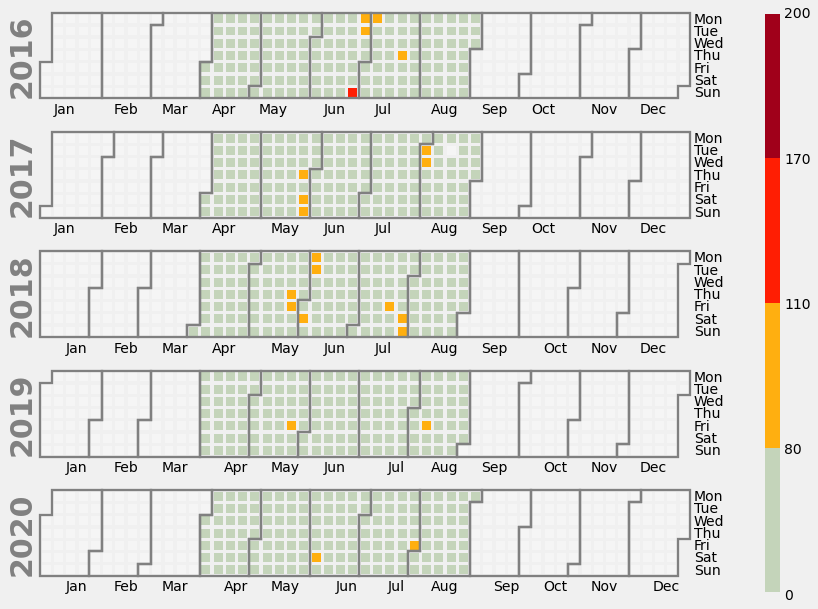

In [ ]:
#import calplot # impport calendar heatmaps from Pandas time series data

def calPlot_city(city='curico', year=""):
  # filtered for city
  df_city = filtered_df[city] 

  # calculates the average PM2.5 per day
  df_city = df_city.resample('D').mean()

  # create the colors for the color bar
  cmap = mpl.colors.LinearSegmentedColormap.from_list("",["#c4d4ba","#FFAF10","#FF1E03","#A0001A"  ])
 
  # Intervals for the color bar
  bounds = [0, 80, 110, 170, 200]

  # normalize between 0 and 1 the intervals for the color bar
  norm = mpl.colors.BoundaryNorm(bounds, cmap.N)  


  print(norm(df_city.max()), df_city.max() )

  # show de calender heatmaps 
  calplot(df_city, cmap=cmap, norm=norm, linewidth=2.3, textfiller='-')


calPlot_city('talca')

- As can be seen on August 15, 2017 there was an error in the measurement or it was an anomalous day within that time period. 

170 155.16666666666666


<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(plot_data, vmin=vmin, #vmax=vmax,
<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(plot_data, vmin=vmin, #vmax=vmax,
<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(plot_data, vmin=vmin, #vmax=vmax,
<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing paramet

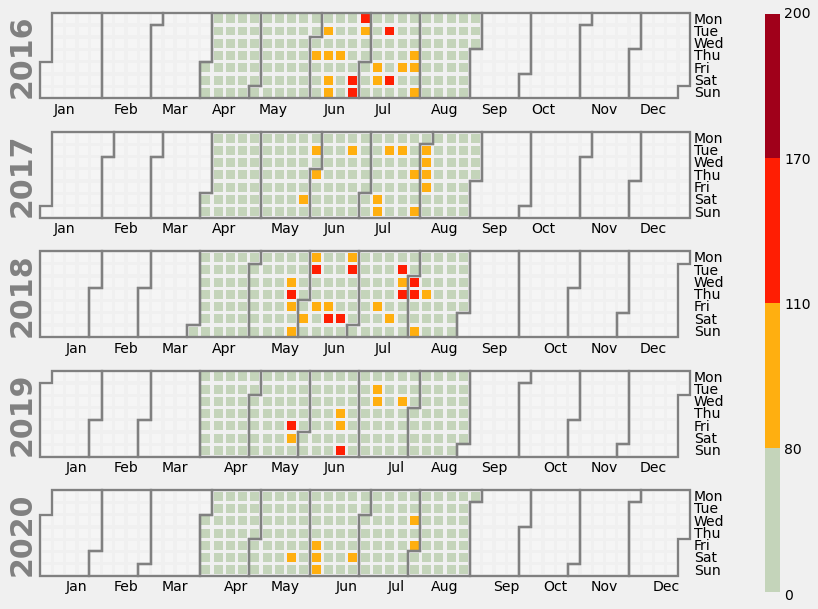

In [ ]:
calPlot_city('curico')

256 359.4166666666667


<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(plot_data, vmin=vmin, #vmax=vmax,
<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(plot_data, vmin=vmin, #vmax=vmax,
<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(plot_data, vmin=vmin, #vmax=vmax,
<ipython-input-68-d7df9b1e8708>:158: MatplotlibDeprecationWarning: Passing paramet

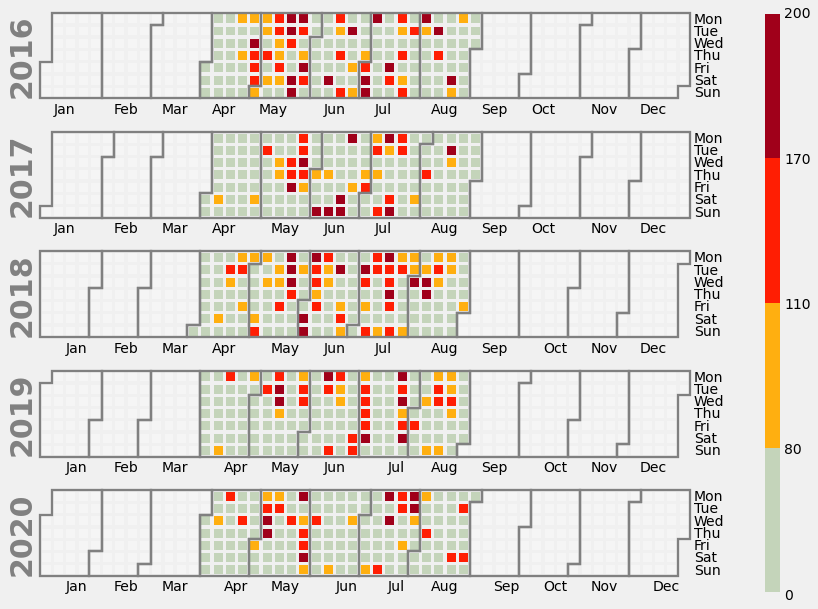

In [ ]:
calPlot_city('osorno')

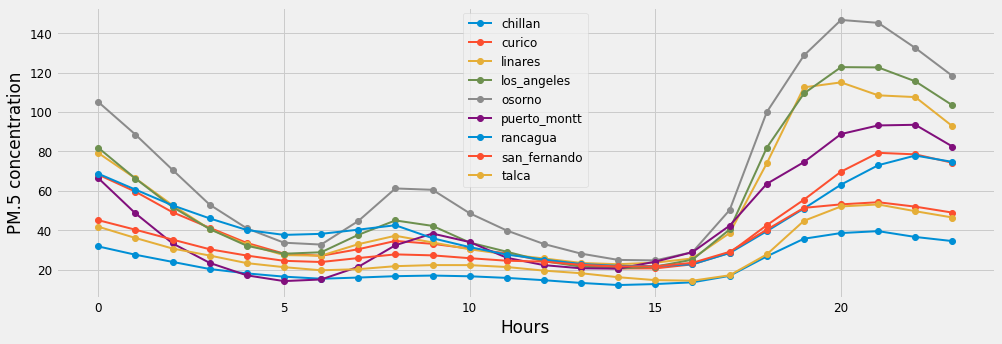

In [ ]:
def plot_mp25_hour(data):
  
  # calculates the average PM2.5 per hour
  data = data.groupby(data.index.map(lambda x: x.hour)).mean()


  # Plot average PM2.5 per hour
  ax = data.plot(linewidth=2, fontsize=12, marker='o')

  # Additional customizations
  ax.set_xlabel('Hours')
  ax.set_ylabel('PM.5 concentration')
  ax.legend(fontsize=12)
  plt.show()

plot_mp25_hour(data=filtered_df)



# Models

## Generate the datasets of train and test

In [ ]:
# filtered for city
df = frame.loc[frame['city'] == 'talca']
del(df['city'])
df.shape

(43847, 1)

In [ ]:
def ts_train_test_normalize(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and air quality data
    output:
      X_train, y_train: data from 2016/1/1-2019/12/31
      X_test:  data from 2020 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2019'].iloc[:,0:1].values
    ts_test  = all_data['2020':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

   
    inputs = pd.concat((all_data["PM25"][:'2019'], all_data["PM25"]['2020':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1) # Convert in array each value of array. Ex: [1,2,3] -> [[1],[2],[3]]
    inputs  = sc.transform(inputs) # Scaled the data 

    # Preparing X_test
    X_test, y_test = [], []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        y_test.append(inputs[i:i+for_periods,0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, y_test, sc

X_train, y_train, X_test, y_test, sc = ts_train_test_normalize(df,24,1)

print("There are " + str(X_train.shape[0]) + " samples in the training data - "+ str(X_train.shape) + " Ytrain: "+ str(y_train.shape))
print("There are " + str(X_test.shape[0]) + " samples in the test data - "+ str(X_test.shape) + " Ytrain: "+ str(y_test.shape))

There are 35038 samples in the training data - (35038, 24, 1) Ytrain: (35038, 1)
There are 8783 samples in the test data - (8783, 24, 1) Ytrain: (8783, 1)


In [ ]:
def evaluate_model( predict):
  testY_inverse = sc.inverse_transform(y_test)

  rmse = tf.keras.metrics.RootMeanSquaredError()
  rmse.update_state(testY_inverse, predict)

  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(testY_inverse, predict)

  mse = tf.keras.metrics.MeanSquaredError()
  mse.update_state(testY_inverse, predict)

  #rmse_sent = math.sqrt(mean_squared_error(testY_inverse, simple_pred))
  print ("Done")
  print ('Test MSE: %.3f' %  mse.result().numpy())
  print ('Test RMSE: %.3f' % rmse.result().numpy())
  print ('Test MAE: %.3f' %  mae.result().numpy())

In [ ]:
%matplotlib inline
plt.figure(figsize=[10, 5]); # Set dimensions for figure


def actual_pred_plot(preds):
    '''
    Plot the actual vs. prediction
    '''
    actual_pred = pd.DataFrame(columns = ['real', 'prediction'])
    actual_pred['real'] =  df.loc['2019':,'PM25'][0:len(preds)] #sc.inverse_transform(y_test)[:,0]
    actual_pred['prediction'] = preds[:,0]

    m = tf.keras.metrics.mean_squared_error(np.array(actual_pred['real']),np.array(actual_pred['prediction']))
    #m.update_state(np.array(actual_pred['real']),np.array(actual_pred['prediction']))
    
    return (m, actual_pred.plot())
  

<Figure size 720x360 with 0 Axes>

## Computing Some Baseline

Naive predictions (just predict the last observed value):

In [ ]:
y_pred = X_test[:, -1] # Toma los valosres de t-1 
np.mean(keras.losses.mean_squared_error(y_test, y_pred))

0.00024818016983482825

In [ ]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True, n_steps=24):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.xlim(0, n_steps + 1)
    #plt.axis([0, n_steps + 1, 0, ])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")


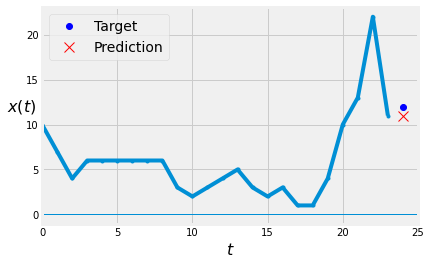

In [ ]:
plot_series(sc.inverse_transform(X_test[0, :, 0].reshape(-1,1)), sc.inverse_transform(y_test)[0, 0], sc.inverse_transform(y_pred)[0, 0])
plt.show()

## Simple RNN

In [ ]:
np.v

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model_simple = keras.models.Sequential()

model_simple.add(keras.layers.SimpleRNN(1, input_shape=[None, 1]))

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model_simple.compile(loss="mse", optimizer=optimizer)
history = model_simple.fit(X_train, y_train, epochs=20, verbose=0)
                    #validation_data=(X_valid, y_valid))
    
model.summary()

NotImplementedError: Cannot convert a symbolic Tensor (simple_rnn_10/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
model_simple.evaluate(X_test, y_test)

In [ ]:
# Finalizing predictions
simple_pred = model_simple.predict(X_test)
#from sklearn.preprocessing import MinMaxScaler
simple_pred = sc.inverse_transform(simple_pred)

In [ ]:
evaluate_model(simple_pred)

In [ ]:
 actual_pred_plot(simple_pred) 

## Deep RNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model_RNN = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model_RNN.compile(loss="mse", optimizer="adam")
history = model_RNN.fit(X_train, y_train, epochs=20,)
                    #validation_data=(X_valid, y_valid))

In [ ]:
model_RNN.evaluate(X_test, y_test)

In [ ]:
# Finalizing predictions
rnn_pred = model_RNN.predict(X_test)
#from sklearn.preprocessing import MinMaxScaler
rnn_pred = sc.inverse_transform(rnn_pred)

In [ ]:
evaluate_model(rnn_pred)

In [ ]:
actual_pred_plot(rnn_pred)  

## LSTM

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model_LSTM = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])

model_LSTM.compile(loss="mse", optimizer="adam")
history = model_LSTM.fit(X_train, y_train, epochs=20,)
                    #validation_data=(X_valid, Y_valid))

In [ ]:
model_LSTM.evaluate(X_test, y_test)

In [ ]:
# Finalizing predictions
LSTM_pred = model_LSTM.predict(X_test)
#from sklearn.preprocessing import MinMaxScaler
LSTM_pred = sc.inverse_transform(LSTM_pred)

In [ ]:
evaluate_model(LSTM_pred)

In [ ]:
actual_pred_plot(LSTM_pred)  